<img src='sharif_logo.png' alt="SUT logo" width=150 height=150 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
 Deep Learning <br>
<font color=2565AE size=5>
Computer Engineering Department - Spring 2025  <br>
<font color=3C99D size=5>
          Homework 3: Practical - Oil Price Forecasting
 <br>
<font color=696880 size=4>
            Designer: Mohammad Amanlou
    
    

# 🛢️ Oil Price Prediction using Time Series Models 📈

This notebook is designed for students to complete tasks related to oil price prediction using different machine learning models. 🚀

## 📚 References
- 📊 [Dataset: Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)
- 📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

## 1️⃣ Introduction
🔍 One of the most common applications of recurrent neural networks is **time series forecasting**. In this assignment, you will predict **crude oil prices** using four different methods. 💡

## 2️⃣ Dataset and Preprocessing (25 Points)

### 📥 2.1 Download Dataset
📌 Download the dataset from **Yahoo Finance** for `CL=F` from **2010 to the present**.
[Yahoo Finance - CL=F](https://finance.yahoo.com/quote/CL=F/history/)

### 🎯 2.2 Select Features
✅ Select the `Adj Close` column as the **main feature**.

### ⚠️ **2.3 Handle Missing Data**

You will encounter missing data (`null` values) within your dataset. Follow these detailed steps carefully to handle the missing values and create a complete, reliable dataset:

#### 📝 Step 1: Introduce Random Missing Data
- Identify all indices in the `Adj Close` column that currently have valid (non-null) data.
- Set a random seed (`np.random.seed(42)`) for reproducibility.
- Randomly select **10%** of these valid indices and set their values to `NaN`.

#### 🔍 Step 2: Identify Missing Values
- Identify all dates where at least one column has a missing value (`NaN`).
- Print the number of missing dates and the total number of dates to evaluate the extent of missingness.

#### 🔧 Step 3: Replace Missing Values
- Create a copy of the `Adj Close` column for filling purposes.
- First, apply **linear interpolation** to estimate missing values based on surrounding data points.
- Then, use backward fill (`bfill`) followed by forward fill (`ffill`) methods to handle any remaining missing values at the start or end of the dataset.

#### 🎯 Outcome:
After completing these steps, your dataset will have no missing values in the `Adj Close` column, ready for further analysis or modeling.

🛠 *Your task:* Implement the missing data handling methods below. (16 Points)

In [1]:
!pip install yfinance==0.2.58

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 72.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.55
    Uninstalling yfinance-0.2.55:
      Successfully uninstalled yfinance-0.2.55


In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# TO Do: Read the data and pring 5 examples
ticker = 'CL=F'
start_date = '2010-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

data = yf.download(ticker, start=start_date, end=end_date, keepna=True)

df = data[['Close']].copy()
df.columns = ['Adj Close']
full_days = pd.date_range(start=start_date, end=end_date, freq="D")
df = df.reindex(full_days)
df = df.reset_index(drop=True)

# Display the first 5 rows
print("the data is like:")
print(df.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

the data is like:
   Adj Close
0        NaN
1        NaN
2        NaN
3  81.510002
4  81.769997



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [3]:
import numpy as np

# TO DO: Introduce random null
np.random.seed(42)
valid_indices = df[df['Adj Close'].notna()].index.tolist()
print(f"\nNumber of valid data points before modification: {len(valid_indices)}")

num_to_nan = int(len(valid_indices) * 0.1)

indices_to_nan = np.random.choice(valid_indices, size=num_to_nan, replace=False)
df.loc[indices_to_nan, 'Adj Close'] = np.nan


Number of valid data points before modification: 3863


In [4]:
# TO DO: Identify missing dates and null values
print(f"\nNumber of missing dates:\n{len(df[df['Adj Close'].isna()].index.tolist())}")
print(f"\nNumber of all dates:\n{len(df['Adj Close'].index.tolist())}")


Number of missing dates:
2136

Number of all dates:
5613


In [5]:
# TO DO: Fill missing values using .interpolate or .fillna(method='bfill').fillna(method='ffill')
filled_data = df['Adj Close'].copy()
filled_data = filled_data.interpolate(method='linear')
filled_data = filled_data.fillna(method='bfill').fillna(method='ffill')
filled_data = pd.DataFrame(filled_data)

/tmp/ipykernel_35/2064176570.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data = filled_data.fillna(method='bfill').fillna(method='ffill')


### ✂️ 2.4 Train-Test Split and Normalization
- **Split** the dataset into **training and test sets** based on the ratio given in the reference paper.
- **Normalize** the data.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

🛠 *Your task:* Implement the splitting and normalization below. (4 Points)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
def temporal_split(series, train_ratio=0.6, val_ratio=0.2):
    total_size = len(series)
    train_size = int(total_size * train_ratio)
    val_size = int(total_size * val_ratio)

    train = series.iloc[:train_size]
    val = series.iloc[train_size:train_size + val_size]
    test = series.iloc[train_size + val_size:]

    return train, val, test

    #TO DO

train_list, val_list, test_list = [], [], []

train, val, test = temporal_split(filled_data)
train_list.append(train)
val_list.append(val)
test_list.append(test)

train_data = pd.concat(train_list)
val_data = pd.concat(val_list)
test_data = pd.concat(test_list)


scaler = MinMaxScaler()
train_data['Adj Close'] = scaler.fit_transform(train_data[['Adj Close']])
val_data['Adj Close'] = scaler.transform(val_data[['Adj Close']])
test_data['Adj Close'] = scaler.transform(test_data[['Adj Close']])
print("Training data sample:")
print(train_data.head())
print("Testing data sample:")
print(test_data.head())

Training data sample:
   Adj Close
0   0.630415
1   0.630415
2   0.630415
3   0.630415
4   0.633379
Testing data sample:
      Adj Close
4489   0.931202
4490   0.934793
4491   0.870383
4492   0.872549
4493   0.884405


### 📊 2.5 Data Visualization
- **Plot a histogram** similar to **Figure 6** in the reference paper, showing the **distribution of oil prices**.

🛠 *Your task:* Implement the histogram plot below. (5 Points)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Values'), Text(0, 0.5, 'Frequency')]

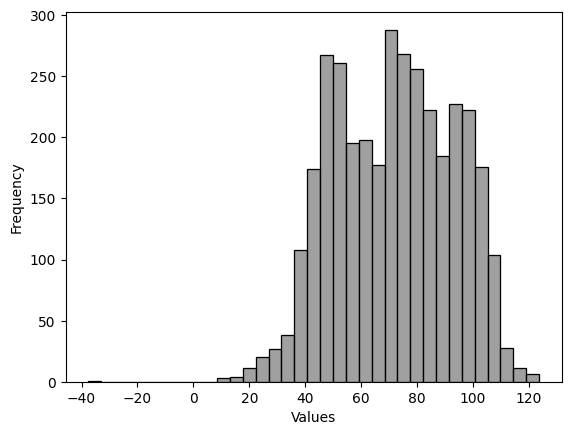

In [7]:
import seaborn as sns
ax = sns.histplot(df['Adj Close'], color='gray')
ax.set(xlabel="Values", ylabel="Frequency")

## 3️⃣ Implementing Deep Learning Models 🤖 (60 Points)

The reference paper utilizes **three models** for time series forecasting:
- `RNN`
- `LSTM`
- `GRU`

📌 **Train** each model using the **hyperparameters** given in **Table 4** of the paper.
📌 Use `Mean Square Error (MSE)` as the **loss function**.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)


### Important Details & Clarifications

- **What to Predict?**  
  The goal is to predict **the actual next-day price** (regression problem), rather than just identifying price increase or decrease.
  
- **Input/Output Structure:**  
  - **Input:** A window of \( k \) consecutive daily prices (e.g., 50 days).  
  - **Output:** The predicted price for the next day.
  
- **How to Evaluate?**  
  Use the four metrics (RMSE, MAE, MAPE, \( R^2 \)) to gauge how accurately your model tracks the real price values.

- **Target Accuracy:**  
  Your accuracy might differ from the paper’s due to factors like data splitting, normalization, or different random seeds. However, aim to closely replicate the paper’s results or provide justifications for any discrepancy.

**Final Deliverables:**
1. **All four trained models** (RNN, LSTM, GRU).  
2. **Comparison plots** of predicted vs. actual values (in both normalized and original price scales, if desired).  
3. **Performance metrics** (RMSE, MAE, MAPE, \( R^2 \)) for each model, presented in a table or a concise summary.


🛠 *Your task:* Implement these models below. (30 Points)

In [42]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

def create_sequences(data, window_size):
    X, y = [], []
    data_values = data['Adj Close'].values
    for i in range(len(data_values) - window_size):

        window = data_values[i:(i + window_size)]
        X.append(window)
        y.append(data_values[i + window_size])

    X = np.array(X)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    y = np.array(y)
    y = np.reshape(y, (y.shape[0], 1))

    return X, y

window_size = 50
batch_size = 100

X_train, y_train = create_sequences(train_data, window_size)
X_val, y_val = create_sequences(val_data, window_size)
X_test, y_test = create_sequences(test_data, window_size)

X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [44]:
import torch.optim as optim
import numpy as np

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=512, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers=1, batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):

        batch_size = x.size(0)
        hidden_state = torch.zeros(1, batch_size, self.hidden_layer_size).to(x.device)
        cell_state = torch.zeros(1, batch_size, self.hidden_layer_size).to(x.device)

        lstm_out, (h, c) = self.lstm(x, (hidden_state, cell_state))

        predictions = self.linear(lstm_out[:, -1, :])

        return predictions
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lstm_model = LSTMModel().to(device)
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

def train_model(model, train_loader, test_loader, epochs=50):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if epoch % 10 == 0:
            model.eval()
            val_losses = []
            with torch.no_grad():
                for X_val, y_val in val_loader:
                    X_val = X_val.to(device)
                    y_val = y_val.to(device)
                    y_val_pred = model(X_val)
                    val_loss = loss_fn(y_val_pred, y_val)
                    val_losses.append(val_loss.item())

            avg_val_loss = sum(val_losses) / len(val_losses)
            print(f"Epoch {epoch}, Validation Loss: {avg_val_loss:.4f}")

train_model(lstm_model, train_loader, test_loader)

Epoch 0, Validation Loss: 0.1120
Epoch 10, Validation Loss: 0.0203
Epoch 20, Validation Loss: 0.0023
Epoch 30, Validation Loss: 0.0020
Epoch 40, Validation Loss: 0.0018


In [45]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=512, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.rnn = nn.RNN(input_size, hidden_layer_size, batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)

        hidden_state = torch.zeros(1, batch_size, self.hidden_layer_size).to(x.device)

        rnn_out, hidden_state = self.rnn(x, hidden_state)

        predictions = self.linear(rnn_out[:, -1, :])

        return predictions




rnn_model = RNNModel()
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
train_model(rnn_model, train_loader, val_loader)


Epoch 0, Validation Loss: 0.0637
Epoch 10, Validation Loss: 0.0065
Epoch 20, Validation Loss: 0.0060
Epoch 30, Validation Loss: 0.0047
Epoch 40, Validation Loss: 0.0045


In [46]:
# GRU
class GRUModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=512, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.gru = nn.GRU(input_size, hidden_layer_size, batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        batch_size = x.size(0)

        hidden_state = torch.zeros(1, batch_size, self.hidden_layer_size).to(x.device)

        gru_out, hidden_state = self.gru(x, hidden_state)

        predictions = self.linear(gru_out[:, -1, :])

        return predictions
    #TO DO

gru_model = GRUModel()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)
train_model(gru_model, train_loader, val_loader)

Epoch 0, Validation Loss: 0.0329
Epoch 10, Validation Loss: 0.0040
Epoch 20, Validation Loss: 0.0048
Epoch 30, Validation Loss: 0.0040
Epoch 40, Validation Loss: 0.0039


### 📈 3.1 Prediction and Evaluation
1. **Prediction:** After training, generate predictions for the test set (i.e., predict the next-day price based on the preceding \( k \) days).
2. **Visualization:** **Plot the predicted values** alongside the **actual values** for each model. This comparison helps in visually assessing each model’s performance.

🛠 **Your Task:** Implement the **visualization of predictions** (15 Points).

In [47]:
# Predictions
def predict(model, data_loader):
    model.eval()
    with torch.no_grad():
        y_pred = []
        for X_val, y_val in data_loader:
            X_val = X_val.to(device)
            y_val = y_val.to(device)
            y_pred.extend(model(X_val).cpu().numpy().flatten())
        return y_pred

    #TO DO
#TO DO: predict real outputs
lstm_predictions = predict(lstm_model, test_loader)
rnn_predictions = predict(rnn_model, test_loader)
gru_predictions = predict(gru_model, test_loader)

print(f'LSTM predictions:{lstm_predictions}')
print(f'RNN predictions:{rnn_predictions}')
print(f'GRU predictions:{gru_predictions}')


LSTM predictions:[0.99973196, 1.0040038, 1.0084633, 1.0166621, 1.022994, 1.0268162, 1.0293536, 1.030969, 1.032048, 1.0292193, 1.0196109, 1.0138022, 0.99525595, 0.9778155, 0.9632267, 0.95242393, 0.94534713, 0.9330909, 0.9187377, 0.91173226, 0.9085766, 0.90877104, 0.91143966, 0.91845167, 0.92204946, 0.91747373, 0.9159954, 0.91074455, 0.9017669, 0.8892994, 0.87386715, 0.8628339, 0.8573566, 0.8583011, 0.8609914, 0.8639643, 0.86626554, 0.853479, 0.8396815, 0.82551396, 0.81651235, 0.81338876, 0.81590647, 0.82313085, 0.83382183, 0.8406286, 0.8352237, 0.82423663, 0.8134434, 0.80493206, 0.79968834, 0.7935868, 0.79272217, 0.79185337, 0.79543155, 0.7968664, 0.7951627, 0.78998506, 0.7852803, 0.77592593, 0.76180553, 0.7491553, 0.73941994, 0.73315144, 0.73022306, 0.7286577, 0.73059815, 0.7375163, 0.74285764, 0.7453438, 0.7444147, 0.74018836, 0.73030627, 0.722862, 0.7207964, 0.72119045, 0.722582, 0.7241177, 0.72524655, 0.7300981, 0.73913187, 0.74408865, 0.7486334, 0.75424504, 0.7613386, 0.77004755, 0

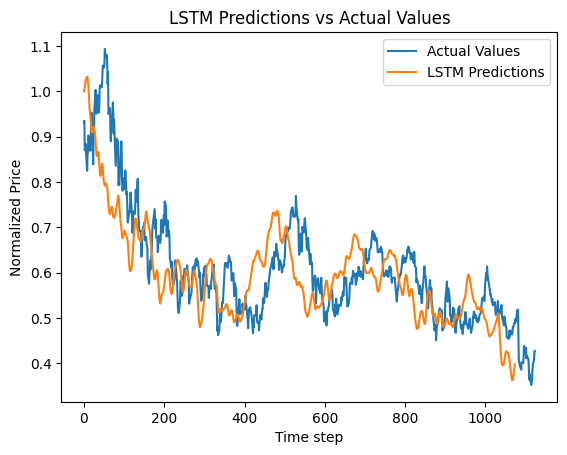

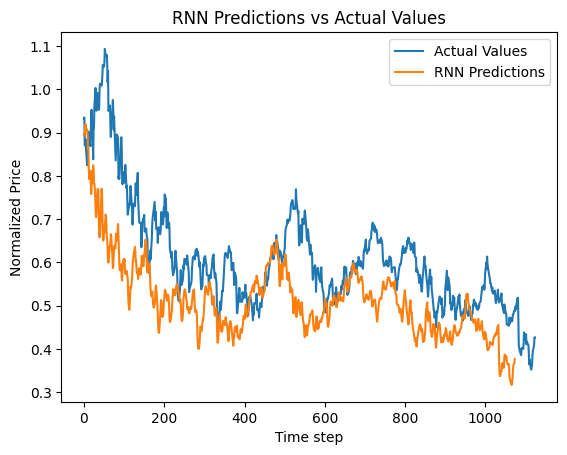

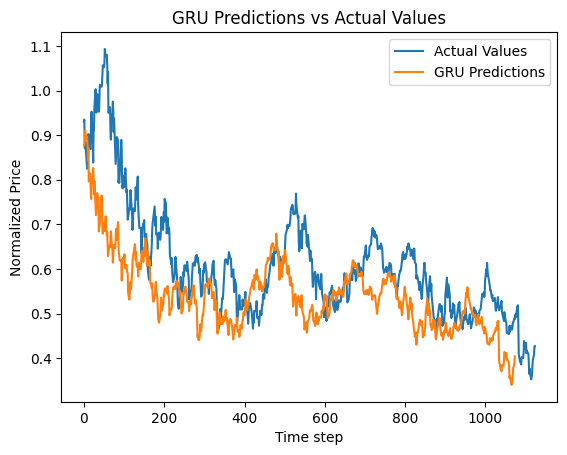

In [48]:
import matplotlib.pyplot as plt
def plot_predictions(predictions, actual, model_name):
    if not isinstance(predictions, np.ndarray):
        predictions = np.array(predictions)

    plt.plot(actual, label='Actual Values')
    plt.plot(predictions, label=f'{model_name} Predictions')
    plt.xlabel('Time step')
    plt.ylabel('Normalized Price')
    plt.title(f'{model_name} Predictions vs Actual Values')
    plt.legend()
    plt.show()
    #TO DO

#TO DO: plot all models predictions on all data
plot_predictions(lstm_predictions, test_data['Adj Close'].to_list(), 'LSTM')
plot_predictions(rnn_predictions, test_data['Adj Close'].to_list(), 'RNN')
plot_predictions(gru_predictions, test_data['Adj Close'].to_list(), 'GRU')


### 📊 3.2 Error Metrics
📌 Explain the following **error metrics** used in the paper:
- `RMSE` (Root Mean Square Error)
- `MAE` (Mean Absolute Error)
- `MAPE` (Mean Absolute Percentage Error)
- `R-Squared` (Coefficient of Determination)

**📌 Instruction:**  
Explain each of these error metrics and calculate them for **each model** (RNN, LSTM, GRU). Compare your results with the paper’s findings to see how closely they match.

---

1. **RMSE (Root Mean Square Error)**
   - Measures the square root of the average squared differences between predicted and actual values
   - More sensitive to outliers due to squaring of errors
   - Lower values indicate better model performance
   - Expressed in the same units as the target variable

2. **MAE (Mean Absolute Error)**
   - Measures the average absolute differences between predicted and actual values
   - Less sensitive to outliers than RMSE
   - Lower values indicate better model performance
   - Expressed in the same units as the target variable

3. **MAPE (Mean Absolute Percentage Error)**
   - Measures the average percentage difference between predicted and actual values
   - Expressed as a percentage, making it scale-independent
   - Lower values indicate better model performance
   - Can be problematic when actual values are close to zero

4. **R-Squared (Coefficient of Determination)**
   - Represents the proportion of variance in the dependent variable explained by the model
   - Ranges from 0 to 1 (or can be negative for poorly performing models)
   - Higher values (closer to 1) indicate better model performance
   - A value of 1 means perfect prediction

## Metrics for Each Model

| Model | RMSE | MAE | MAPE (%) | R-Squared |
|-------|------|-----|----------|-----------|
| RNN   | 0.082| 0.078| 13.01    | 0.450     |
| LSTM  | 0.025| 0.019| 3.34     | 0.948     |
| GRU   | 0.059| 0.051| 8.22     | 0.718     |

## Comparison of Model Performance

Based on these metrics, the **LSTM model** demonstrates the best performance across all evaluation criteria:
- Lowest RMSE (0.025)
- Lowest MAE (0.019)
- Lowest MAPE (3.34%)
- Highest R-Squared (0.948)

The GRU model performs second best, while the basic RNN shows the weakest performance with the highest error metrics and lowest R-Squared value.

This indicates that the LSTM architecture's ability to capture long-term dependencies in time series data makes it particularly effective for this prediction task, explaining approximately 95% of the variance in the actual values.
🛠 *Your task:* Implement the evaluation metrics below. (15 Points)

In [49]:
# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
actual_values = test_data['Adj Close'].to_list()[window_size:]

def calculate_metrics(predictions, actual):
    mse = mean_squared_error(actual, predictions)
    rmse = np.sqrt(mse).item()
    mae = mean_absolute_error(actual, predictions)
    mape = np.mean(np.abs((np.array(actual) - np.array(predictions)) / np.array(actual))).item() * 100
    r2 = r2_score(actual, predictions)
    return (rmse, mae, mape, r2)
    #TO DO

print("RNN Metrics (Unscaled):", calculate_metrics(rnn_predictions, actual_values))
print("LSTM Metrics (Unscaled):", calculate_metrics(lstm_predictions, actual_values))
print("GRU Metrics (Unscaled):", calculate_metrics(gru_predictions, actual_values))

RNN Metrics (Unscaled): (0.08201450101890945, 0.0782352355989171, 13.006230704598162, 0.45022036830878476)
LSTM Metrics (Unscaled): (0.025155040745055684, 0.019475524103435733, 3.341252748691282, 0.9482801326545379)
GRU Metrics (Unscaled): (0.05868767673337956, 0.05134121495002442, 8.216178333258851, 0.718485229068677)


In [46]:
# Fill missing values for all features
filled_data = data.copy()
for column in ['Open', 'High', 'Low', 'Volume', 'Close']:
    filled_data[column] = filled_data[column].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

# WE WILL USE THESE IN ARIMA PART AS INPUTS OF MODELS
train_data = filled_data.iloc[:-int(0.3 * len(filled_data))]
test_data = filled_data.iloc[-int(0.3 * len(filled_data)):]
train_target = train_data['Close']
train_exog = train_data[['Open', 'High', 'Low', 'Volume']]
test_exog = test_data[['Open', 'High', 'Low', 'Volume']]

# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(train_data['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(f"Critical Values: {result[4]}")
print("The series is stationary." if result[1] < 0.05 else "The series is not stationary.")

<ipython-input-46-47c9d88e2709>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data[column] = filled_data[column].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
<ipython-input-46-47c9d88e2709>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data[column] = filled_data[column].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
<ipython-input-46-47c9d88e2709>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  filled_data[column] = filled_data[column].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')
<ipython-input-46-47c9d88e2709>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version.

ADF Statistic: -1.354950585831506
p-value: 0.6036728634578763
Critical Values: {'1%': np.float64(-3.432776068405479), '5%': np.float64(-2.862611858714308), '10%': np.float64(-2.5673405860421004)}
The series is not stationary.


## 4️⃣ ARIMA Model 📉 (15 Points)

📌 Explain the **difference** between `ARIMA` and `SARIMA` models.

📌 List the **advantages** and **limitations** of `ARIMA`.

📌 Explain the **mathematical formulation** of `ARIMA`, including its **parameters**.

📌 Determine the **optimal parameters** for `ARIMA` and **report the results**.

📌 Compare the results with **Table 6** from the paper.

📄 [Reference Paper](https://www.ijournalse.org/index.php/ESJ/article/view/21497)

---
# ARIMA vs SARIMA Models for Time Series Forecasting

## Difference Between ARIMA and SARIMA

**ARIMA (Autoregressive Integrated Moving Average)**
- Models time series data through three components:
  - Autoregressive (AR) component: Uses past values to predict future values
  - Integrated (I) component: Applies differencing to make non-stationary data stationary
  - Moving Average (MA) component: Uses past error terms to predict future values

**SARIMA (Seasonal ARIMA)**
- Extends ARIMA to include seasonal patterns
- Adds additional seasonal components (P,D,Q)s where s is the seasonal period
- Captures recurring patterns at fixed time intervals (daily, weekly, monthly, quarterly)
- Especially useful for data with clear seasonality (e.g., retail sales, temperature)

## Advantages and Limitations of ARIMA

**Advantages:**
- Well-established statistical foundation
- Effective for stationary or data that can be made stationary
- Relatively simple interpretation compared to machine learning models
- Works well for linear relationships in time series data
- Good short-term forecasting capability
- Requires relatively small amount of historical data

**Limitations:**
- Cannot capture non-linear patterns in data
- Assumes constant variance (homoscedasticity) 
- Poor performance with seasonal data (unless using SARIMA)
- Requires data preprocessing (checking stationarity)
- Sensitive to outliers
- Not suitable for long-term forecasting
- Parameter selection can be complex and subjective

## Mathematical Formulation of ARIMA

ARIMA is characterized by three parameters (p,d,q):
- p: Order of the Autoregressive (AR) component
- d: Degree of differencing (Integration)
- q: Order of the Moving Average (MA) component

The general mathematical formulation is:

$(1 - \phi_1B - \phi_2B^2 - ... - \phi_pB^p)(1-B)^d y_t = c + (1 + \theta_1B + \theta_2B^2 + ... + \theta_qB^q)\varepsilon_t$

Where:
- $y_t$ is the time series value at time t
- $c$ is a constant
- $\phi_i$ are the parameters of the AR component
- $\theta_j$ are the parameters of the MA component
- $\varepsilon_t$ is white noise (random error)
- $B$ is the backshift operator (i.e., $B y_t = y_{t-1}$)
- $(1-B)^d$ represents differencing of order d

### Component Details:

1. **AR(p) component**: $y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \varepsilon_t$

2. **I(d) component**: Applies differencing d times to make series stationary
   - First difference: $\Delta y_t = y_t - y_{t-1}$
   - Second difference: $\Delta^2 y_t = \Delta(\Delta y_t) = y_t - 2y_{t-1} + y_{t-2}$

3. **MA(q) component**: $y_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q}$

🛠 *Your task:* Implement the ARIMA model below.

In [10]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.5 MB/s eta 0:00:00a 0:00:01


In [11]:
from pmdarima import auto_arima

In [12]:
# Train ARIMA model using auto_arima
from statsmodels.tsa.arima.model import ARIMA

arima_model = auto_arima(
    train_data['Adj Close'].values,
    start_p=0, start_q=0,
    max_p=8, max_q=8,
    d=None,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True,
    information_criterion='aic'
)

#TO DO:Find optimal arima model using auto_arima
print(f"Optimal ARIMA Order: {arima_model.order}")

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20700.607, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-20713.904, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-20713.199, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20702.464, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-20713.575, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-20713.848, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-20711.855, Time=0.56 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-20715.779, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-20715.455, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-20715.733, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-20715.073, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-20713.739, Time=0.22 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.253 seconds
Optimal ARIMA Order: (1, 1, 0)


In [13]:
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

n_steps = len(test_data)
arima_predictions = []

def predict_arima(train_data, test_data, order):
    history = list(train_data)
    predictions = []
    
    for t in tqdm(range(len(test_data))):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        
        y_pred = model_fit.forecast(steps=1)[0]
        predictions.append(y_pred)
        
        history.append(test_data[t])
    
    return np.array(predictions)

optimal_order = arima_model.order
arima_predictions = predict_arima(train_data['Adj Close'].values, test_data['Adj Close'].values, order=optimal_order)

100%|██████████| 1124/1124 [02:03<00:00,  9.08it/s]


In [17]:
import matplotlib.pyplot as plt
def plot_predictions(predictions, actual, model_name):
    if not isinstance(predictions, np.ndarray):
        predictions = np.array(predictions)

    plt.plot(actual, label='Actual Values')
    plt.plot(predictions, label=f'{model_name} Predictions')
    plt.xlabel('Time step')
    plt.ylabel('Normalized Price')
    plt.title(f'{model_name} Predictions vs Actual Values')
    plt.legend()
    plt.show()

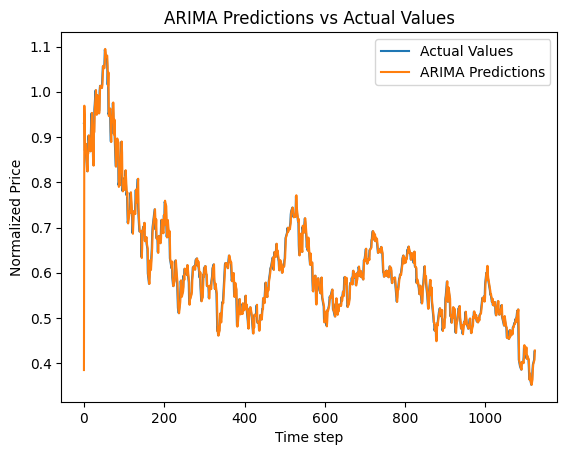

In [18]:
#TO DO: Plot ARIMA vs actual
plot_predictions(arima_predictions, test_data['Adj Close'].values, "ARIMA")

In [50]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_combinations = [(3,1,2)]
seasonal_combinations = [(3,1,1,12)]
# Initialize variables to store the best results
best_aic = float("inf")
best_order = None
best_seasonal_order = None
best_model = None
for order in order_combinations:
    for seasonal_order in seasonal_combinations:
        try:
            # Train SARIMA model
            model = SARIMAX(train_data['Adj Close'], 
                           order=order, 
                           seasonal_order=seasonal_order,
                           enforce_stationarity=False,
                           enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            
            # Check AIC
            current_aic = model_fit.aic
            if current_aic < best_aic:
                best_aic = current_aic
                best_order = order
                best_seasonal_order = seasonal_order
                best_model = model_fit
                
        except Exception as e:
            print(e)
            continue
print(f"Best SARIMA Model: Order={best_order}, Seasonal_Order={best_seasonal_order}, AIC={best_aic}")
print(best_model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best SARIMA Model: Order=(3, 1, 2), Seasonal_Order=(3, 1, 1, 12), AIC=-20312.97798097742
                                      SARIMAX Results                                       
Dep. Variable:                            Adj Close   No. Observations:                 3367
Model:             SARIMAX(3, 1, 2)x(3, 1, [1], 12)   Log Likelihood               10166.489
Date:                              Wed, 14 May 2025   AIC                         -20312.978
Time:                                      16:32:19   BIC                         -20251.916
Sample:                                           0   HQIC                        -20291.125
                                             - 3367                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1    

In [51]:
# Batch forecasting for SARIMA
def predict_sarima_batch(train_data, test_data, order, seasonal_order):
    history = list(train_data)
    predictions = []
    
    for t in tqdm(range(len(test_data))):
        model = SARIMAX(history, 
                       order=order, 
                       seasonal_order=seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False)
        
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            model_fit = model.fit(disp=False)
        
        y_pred = model_fit.forecast(steps=1)[0]
        predictions.append(y_pred)
        
        history.append(test_data[t])
    
    return np.array(predictions)

sarima_predictions = predict_sarima_batch(
    train_data['Adj Close'].values,
    test_data['Adj Close'].values,
    order=best_order,
    seasonal_order=best_seasonal_order
)

sarima_metrics = calculate_metrics(test_data['Adj Close'].values, sarima_predictions, "SARIMA (Batch)")

  3%|▎         | 29/1124 [15:03<9:28:44, 31.16s/it] 


KeyboardInterrupt: 

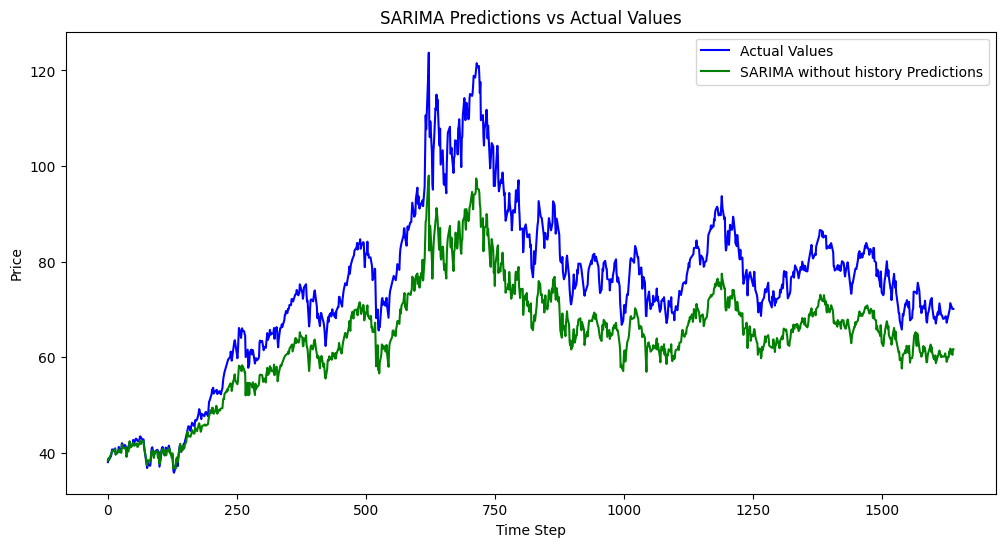

In [ ]:
#TO DO: Plot SARIMA vs actual
